<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [ ]:
import pandas as pd
df = pd.read_csv('/content/exportgbiall01_05_6.csv', sep = ";")
#df

In [2]:
pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=1014beacba358ef5f4c86dcf7f4170bd406bfd23adc567f7d83cc9fcb35f0d9c
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [3]:
import pandas as pd
import pm4py
df = pd.read_csv('/content/exportgbiall01_05_all4.csv',sep=";",names = ['Timestamp','org:resource','case:concept:name', 'transaction', 'concept:name','dialog_steps', 'total response time (s)', 'average response time per dialog steps(ms)', 'total CPU time(s)', 'average CPU time(ms)', 'total database time(s)'],usecols = [1,2,3,4,5,6,7,8,9,10,11])
print(df)
logcost = pm4py.format_dataframe(df, case_id = 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'Timestamp')
logcost['time:timestamp'] = pd.to_datetime(df.Timestamp)



/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


            Timestamp org:resource  case:concept:name transaction  \
0    2025.03.11 10:28   GBIALL-001                  1        FK01   
1    2025.03.11 10:38   GBIALL-001                  1        FK02   
2    2025.03.11 10:43   GBIALL-001                  1        FB60   
3    2025.03.11 10:49   GBIALL-001                  1       FK10N   
4    2025.03.11 10:51   GBIALL-001                  1       FBL1N   
..                ...          ...                ...         ...   
184  2025.03.11 11:08   GBIALL-027                 27        FK01   
185  2025.03.11 11:09   GBIALL-027                 27        FK02   
186  2025.03.11 11:10   GBIALL-027                 27        FB60   
187  2025.03.11 11:12   GBIALL-027                 27       FK10N   
188  2025.03.11 11:13   GBIALL-027                 27        F-53   

                   concept:name  dialog_steps  total response time (s)  \
0    Create Vendor (Accounting)            25                        5   
1    Change Vendor (Acc

filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [ ]:

for variant, subdf in pm4py.split_by_process_variant(logcost):
    print(variant)  # The definition of that particular variant
    #print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
transition_system = pm4py.discover_transition_system(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



[-2760.0, -2040.0, -1860.0, -1080.0, -900.0, 0.0, 0.0, 240.0, 780.0, 900.0, 900.0, 1140.0, 1320.0, 1500.0, 1560.0, 1920.0, 2640.0, 2700.0, 2940.0]
['Timestamp', 'org:resource', 'case:concept:name', 'transaction', 'concept:name', 'dialog_steps', 'total response time (s)', 'average response time per dialog steps(ms)', 'total CPU time(s)', 'average CPU time(ms)', 'total database time(s)', 'time:timestamp', '@@index', '@@case_index']
{'GBIALL-023': 19, 'GBIALL-001': 17, 'GBIALL-005': 16, 'GBIALL-019': 15, 'GBIALL-024': 14, 'GBIALL-007': 12, 'GBIALL-027': 12, 'GBIALL-018': 11, 'GBIALL-009': 10, 'GBIALL-017': 10, 'GBIALL-013': 10, 'GBIALL-008': 8, 'GBIALL-011': 7, 'GBIALL-014': 6, 'GBIALL-002': 6, 'GBIALL-016': 5, 'GBIALL-025': 4, 'GBIALL-012': 4, 'GBIALL-021': 3}
{32: 10, 34: 9, 47: 7, 37: 7, 26: 7, 141: 6, 63: 4, 65: 3, 178: 3, 40: 3, 169: 3, 183: 3, 33: 3, 98: 3, 6: 3, 39: 3, 52: 3, 453: 3, 143: 3, 106: 3, 640: 3, 46: 3, 60: 3, 185: 3, 162: 2, 121: 2, 28: 2, 48: 2, 25: 2, 12: 2, 13: 2, 18

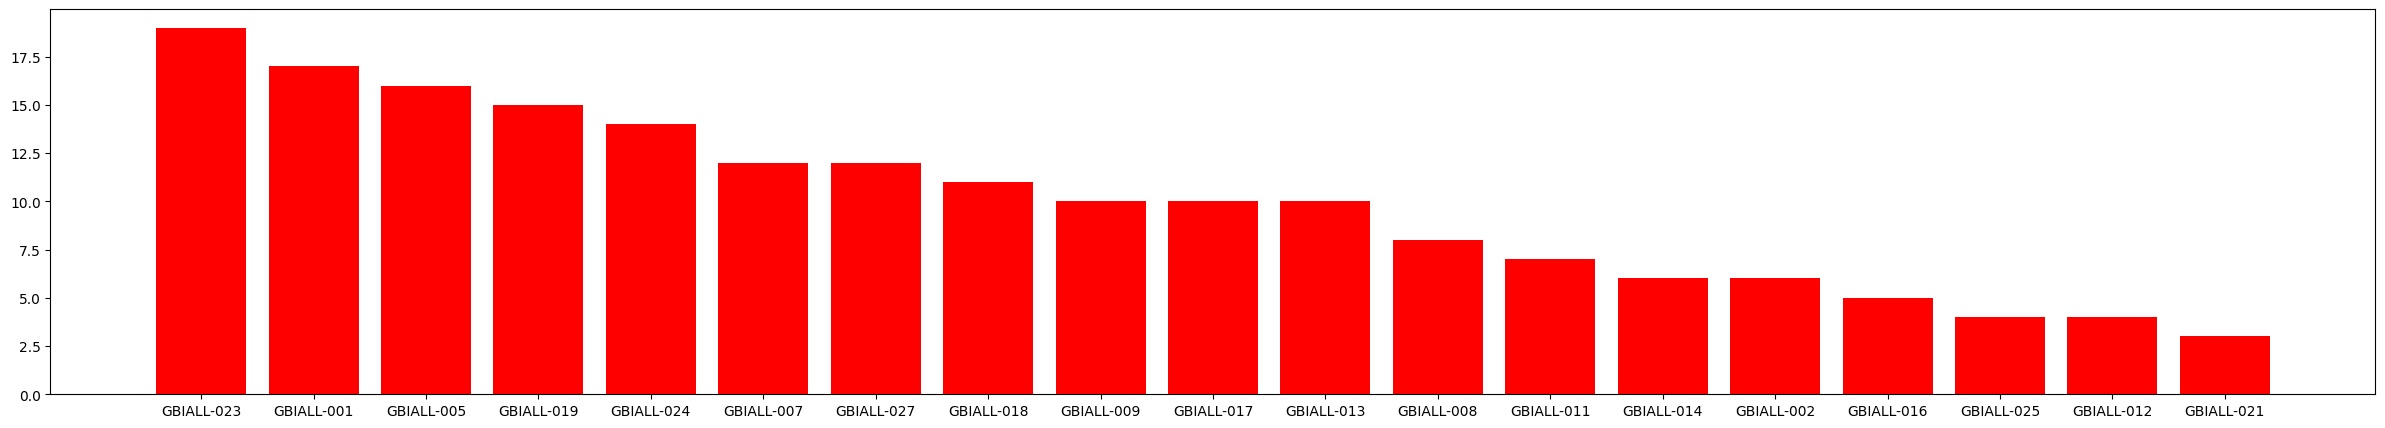

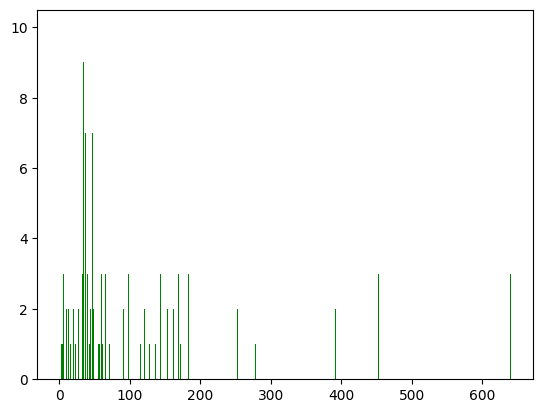

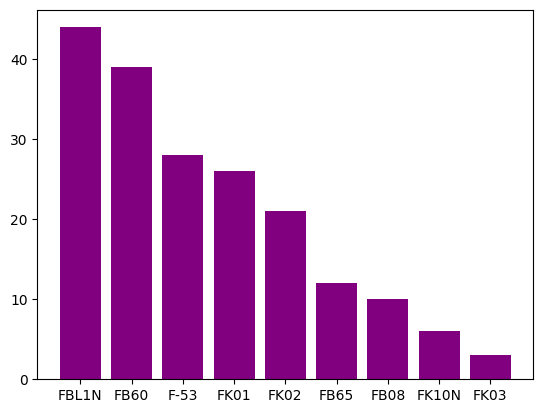

In [42]:
from matplotlib import pyplot as plt
case_duration = pm4py.get_all_case_durations(logcost)
print(case_duration)
attr = pm4py.get_event_attribute_values(logcost, 'org:resource')
attr2 = pm4py.get_event_attribute_values(logcost, 'dialog_steps')
attr3 = pm4py.get_event_attribute_values(logcost, 'transaction')
print(attr4)
print(attr)
print(attr2)
x= attr.keys()
y = attr.values()
x2 = attr2.keys()
y2 = attr2.values()
x3 = attr3.keys()
y3 = attr3.values()
plt.figure(figsize=(30, 5))
plt.bar(x, y, color = 'red')
plt.show()
plt.bar(x2, y2, color = 'green')
plt.show()
plt.bar(x3, y3, color = 'purple')
plt.show()

In [5]:
pm4py.get_start_activities(logcost)

{'Create Vendor (Accounting)': 17, 'Reverse Document': 2}

In [6]:
pm4py.get_end_activities(logcost)

{'Vendor Line Items': 6,
 'Post Outgoing Payments': 6,
 'Enter Incoming Credit Memos': 2,
 'Enter Incoming Invoices': 3,
 'Create Vendor (Accounting)': 2}

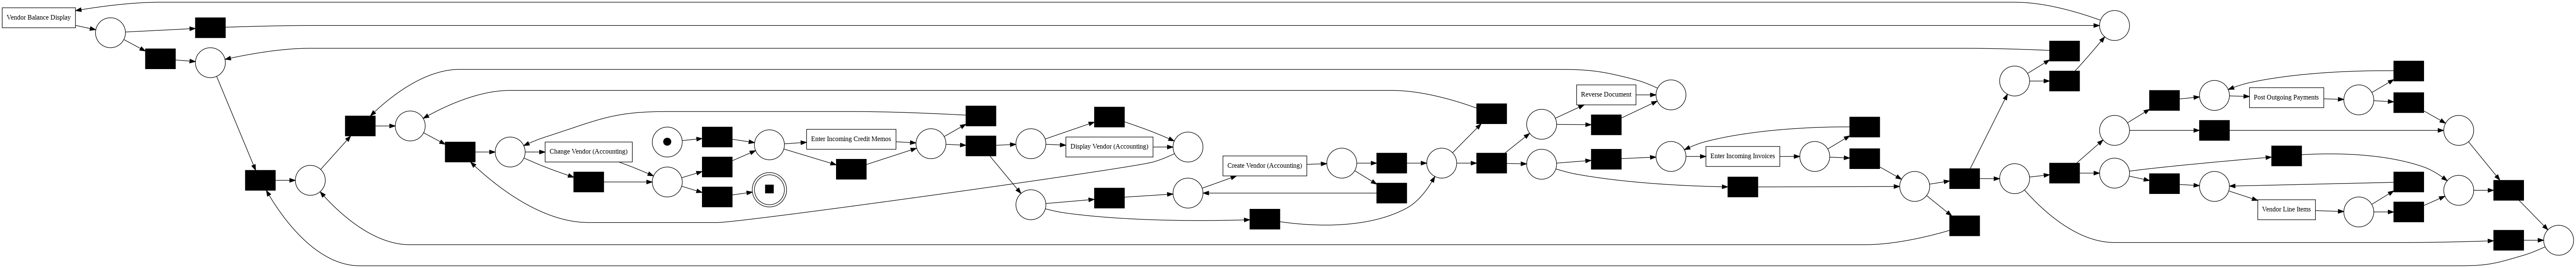

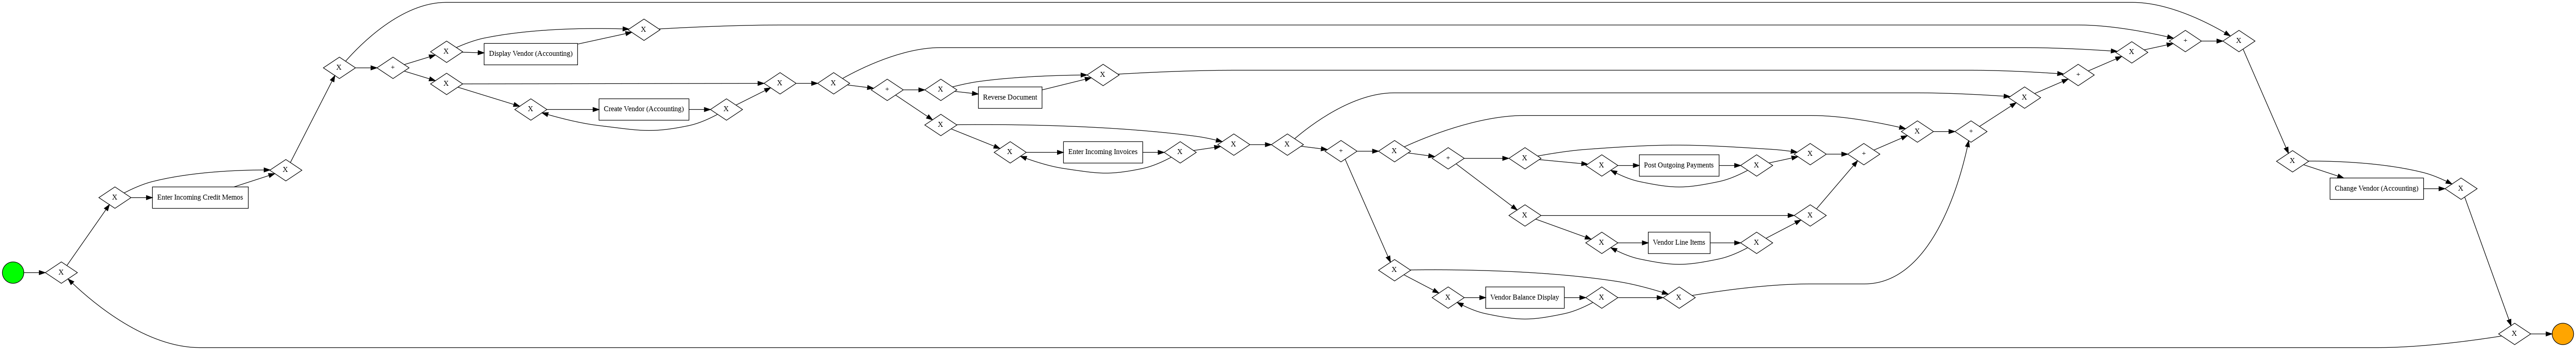

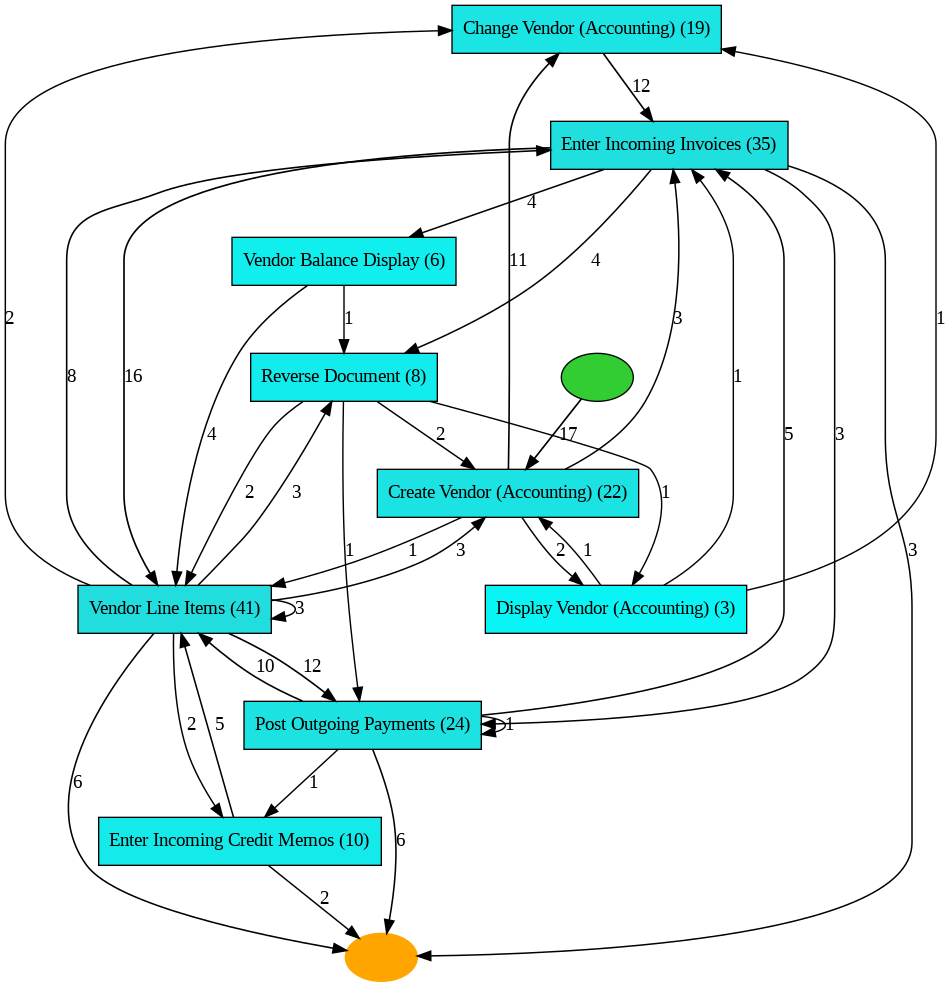

In [10]:
filt_log2 = pm4py.filter_start_activities(logcost, {'Create Vendor (Accounting)'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log2)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)

In [1]:
filtered_log = pm4py.filter_trace_attribute_values(
    logcost,
    'User',
    ['GBIALL-016'],
    case_id_key='case:concept:name'
)
map = pm4py.discover_heuristics_net(filtered_log)
pm4py.view_heuristics_net(map)


NameError: name 'pm4py' is not defined

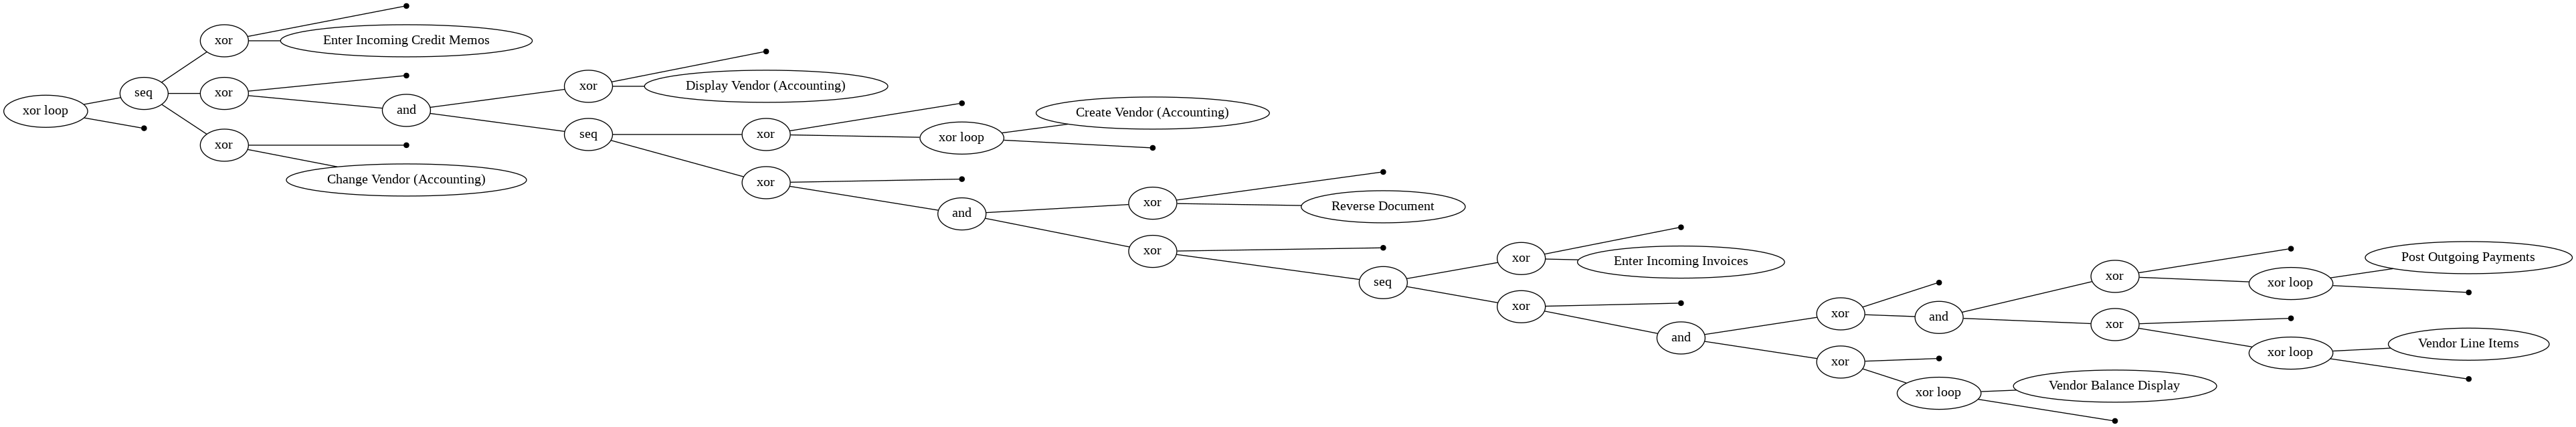

In [8]:
process_tree = pm4py.discover_process_tree_inductive(logcost)
pm4py.view_process_tree(process_tree)

# Feldolgozás

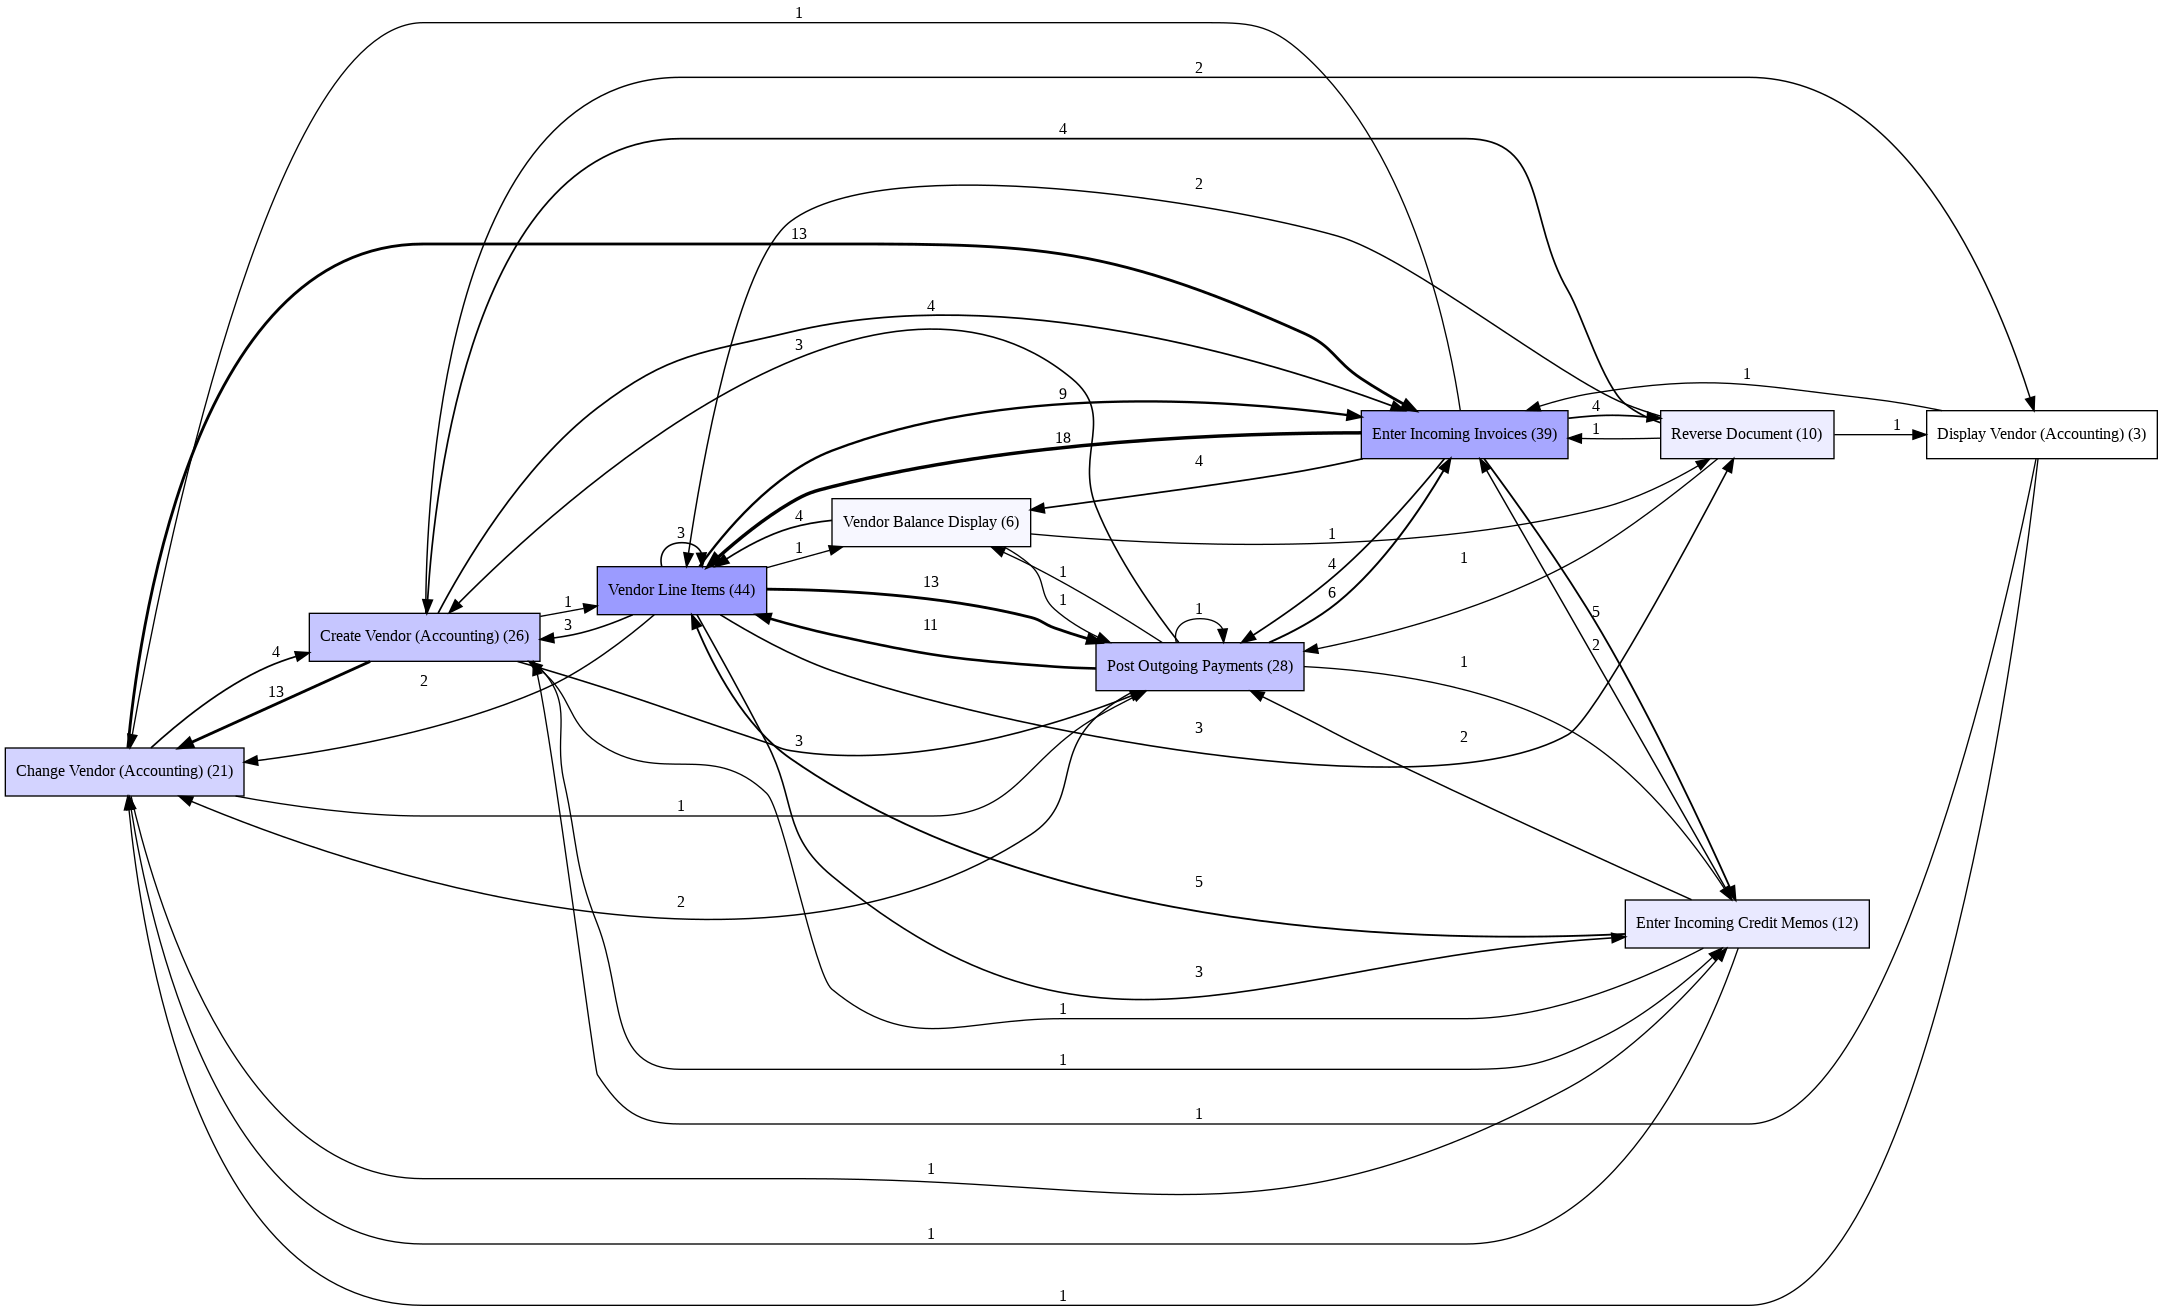

In [11]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [ ]:


dfg = pm4py.discover_dfg(logcost)
print(len(dfg))
for df2 in dfg:
  print(df2)
  print('\n')

In [ ]:
for i in range(0, len(logcost)-1):
  print(logcost['concept:name'][i] + "      " + logcost['concept:name'][i+1])

In [ ]:
logcost

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(logcost, variant=dfg_discovery.Variants.FREQUENCY)
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfg[('Change Document', 'Reverse Document')])
dfg[('Change Document', 'Reverse Document')] =6
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)